In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import glob

# BERT

In [6]:
with open('run-metrics.json', 'r') as f:
    data = json.load(f)
print(data)

{'variance_metrics': {'full_set_var_sum': 0.8372085094451904, 'full_set_var_values': [0.04720380902290344, 0.044494450092315674, 0.035342536866664886, 0.02611238695681095, 0.02580399066209793, 0.023139387369155884, 0.022728022187948227, 0.020031532272696495, 0.019578007981181145, 0.01777792163193226, 0.017403751611709595, 0.015105344355106354, 0.014606666751205921, 0.01379549503326416, 0.01329789124429226, 0.012884845025837421, 0.01252143457531929, 0.012064694426953793, 0.011867150664329529, 0.010915021412074566, 0.01057171169668436, 0.010373061522841454, 0.009938064962625504, 0.009738999418914318, 0.00940626859664917, 0.009144316427409649, 0.008902674540877342, 0.00872676633298397, 0.008597584441304207, 0.008209249936044216, 0.007903060875833035, 0.007700569927692413, 0.00765777425840497, 0.007498912047594786, 0.007375513669103384, 0.007219691760838032, 0.007143080700188875, 0.00705082667991519, 0.006823307368904352, 0.006683649495244026, 0.0065062823705375195, 0.006437181029468775, 0

In [7]:
variance_metrics = data['variance_metrics']
modelling_metrics = data['modelling_metrics']
subset_sizes = modelling_metrics['subset_size']

In [8]:
def get_key(filename):
    return filename.split('/')[2].split('-')[2].split('.')[0].lower()

In [9]:
file_list = glob.glob('./Eval-Results-bert-base-uncased/*')

odd_results = {}
for file in file_list:
    key = get_key(file)
    with open(file, 'r') as f:
        data = f.read()
        odd_results[key] = data
        # process the data as needed


In [10]:
results = {}

In [11]:
results['subset_size'] = subset_sizes
results['r2_value'] = variance_metrics['r2_values']
results['test_accuracy'] = modelling_metrics['test_accuracies']
results['test_loss'] = modelling_metrics['test_losses']

In [12]:
subset_sizes = modelling_metrics['subset_size']

for key, values in odd_results.items():
    values = json.loads(values)
    metrics = values['evaluation_metrics']
    losses = []
    accuracies = []
    for metric in metrics:
        loss = metric['eval_loss']
        acc = metric['eval_accuracy']
        losses.append(loss)
        accuracies.append(acc)

    results[f"{key}_loss"] = losses
    results[f"{key}_accuracy"] = accuracies

In [13]:
results_df = pd.DataFrame(results)
results_df

,subset_size,r2_value,test_accuracy,test_loss,imdb_loss,imdb_accuracy,tweet_eval_loss,tweet_eval_accuracy,yelp_loss,yelp_accuracy
0,5387,0.832513,0.894729,0.252211,0.433245,0.79780,1.011477,0.391342,0.348197,0.839000
1,10774,0.835165,0.908389,0.233609,0.406981,0.81820,0.907701,0.575488,0.276874,0.883789
2,16161,0.836113,0.921010,0.221612,0.465154,0.82468,1.076732,0.537024,0.320366,0.872974
3,21548,0.836640,0.930364,0.213834,0.453719,0.83120,1.261753,0.516423,0.320186,0.874658
4,26935,0.836827,0.926503,0.197311,0.420089,0.83652,0.821245,0.628719,0.291093,0.882763
5,32322,0.837011,0.929473,0.188646,0.451452,0.81724,1.119016,0.481020,0.333663,0.862026
6,37709,0.837129,0.933779,0.184687,0.457932,0.81492,1.377233,0.412591,0.348262,0.856974
7,43096,0.837254,0.937194,0.179340,0.433659,0.82648,0.997468,0.549953,0.297840,0.877500
8,48483,0.837412,0.944172,0.189077,0.484423,0.84104,1.716673,0.454549,0.342963,0.880632
9,53870,0.837376,0.952190,0.176568,0.528025,0.83520,1.807608,0.493409,0.377826,0.870868


In [15]:
results_df['mean_odd_accuracy'] = results_df[['imdb_accuracy', 'tweet_eval_accuracy', 'yelp_accuracy']].mean(axis=1)
results_df['mean_odd_loss'] = results_df[['imdb_loss', 'tweet_eval_loss', 'yelp_loss']].mean(axis=1)
results_df

,subset_size,r2_value,test_accuracy,test_loss,imdb_loss,imdb_accuracy,tweet_eval_loss,tweet_eval_accuracy,yelp_loss,yelp_accuracy,mean_odd_accuracy,mean_odd_loss
0,5387,0.832513,0.894729,0.252211,0.433245,0.79780,1.011477,0.391342,0.348197,0.839000,0.676047,0.597640
1,10774,0.835165,0.908389,0.233609,0.406981,0.81820,0.907701,0.575488,0.276874,0.883789,0.759159,0.530519
2,16161,0.836113,0.921010,0.221612,0.465154,0.82468,1.076732,0.537024,0.320366,0.872974,0.744892,0.620751
3,21548,0.836640,0.930364,0.213834,0.453719,0.83120,1.261753,0.516423,0.320186,0.874658,0.740760,0.678553
4,26935,0.836827,0.926503,0.197311,0.420089,0.83652,0.821245,0.628719,0.291093,0.882763,0.782667,0.510809
5,32322,0.837011,0.929473,0.188646,0.451452,0.81724,1.119016,0.481020,0.333663,0.862026,0.720095,0.634710
6,37709,0.837129,0.933779,0.184687,0.457932,0.81492,1.377233,0.412591,0.348262,0.856974,0.694828,0.727809
7,43096,0.837254,0.937194,0.179340,0.433659,0.82648,0.997468,0.549953,0.297840,0.877500,0.751311,0.576322
8,48483,0.837412,0.944172,0.189077,0.484423,0.84104,1.716673,0.454549,0.342963,0.880632,0.725407,0.848020
9,53870,0.837376,0.952190,0.176568,0.528025,0.83520,1.807608,0.493409,0.377826,0.870868,0.733159,0.904486


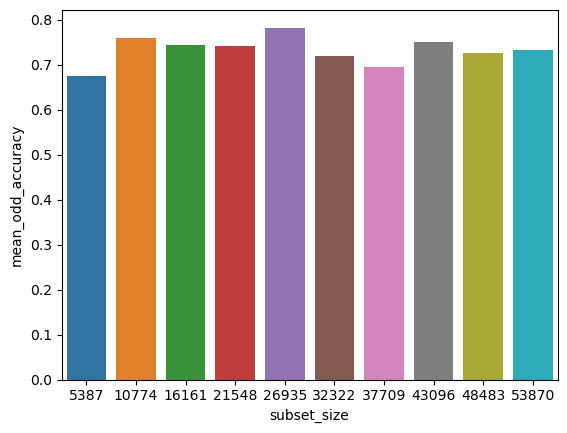

In [26]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'])

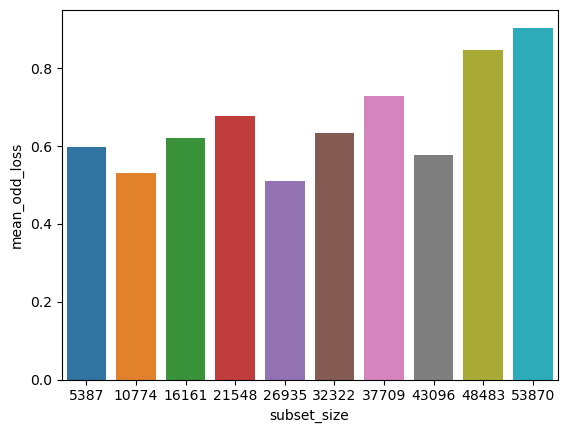

In [27]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'])

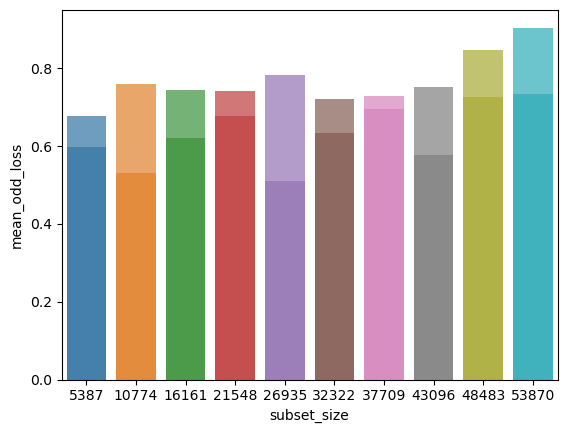

In [28]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7)

[(0.16, 0.96)]

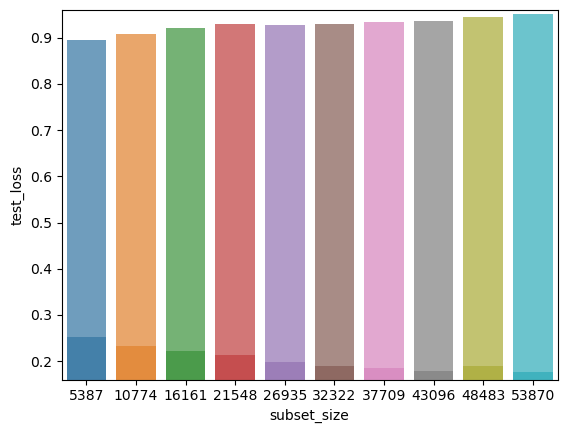

In [22]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7)
plot.set(ylim=(0.16, 0.96))

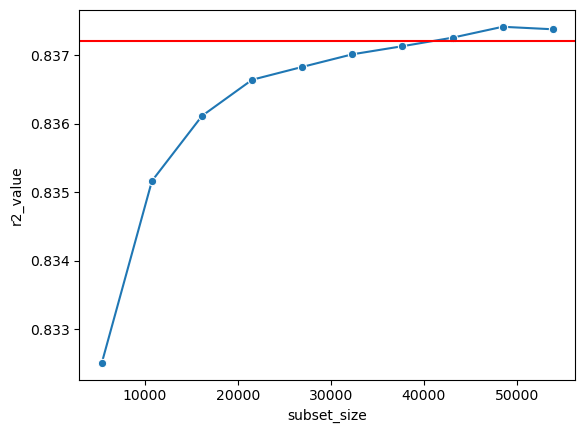

In [21]:
graph = sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], marker="o")
graph.axhline(variance_metrics['full_set_var_sum'], color='red')

In [ ]:
file_list = glob.glob('./Eval-Results-roberta-base/*')

odd_results = {}
for file in file_list:
    key = get_key(file)
    with open(file, 'r') as f:
        data = f.read()
        odd_results[key] = data
        # process the data as needed